In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg
from sympy import *
from sympy.physics.quantum.dagger import Dagger

In [3]:
t,p,ta,pa = symbols('theta phi theta_a phi_a', real=True)

In [6]:
G = Matrix([[cos(p/2)**2, I*cos(p/2)*sin(p/2), cos(p/2), 0],[-I*cos(p/2)*sin(p/2), sin(p/2)**2, -I*sin(p/2),0],
            [cos(p/2),-I*sin(p/2),1,0],[0,0,0,0]])
AP = Matrix([[cos(ta),0,sin(ta),0],[0,cos(ta),0,sin(ta)],[sin(ta),0,-cos(ta),0],
              [0,sin(ta),0,-cos(ta)]])
AR = Matrix([[cos(pa/2),I*sin(pa/2),0,0],[I*sin(pa/2),cos(pa/2),0,0],[0,0,cos(pa/2),I*sin(pa/2)],
             [0,0,I*sin(pa/2),cos(pa/2)]])
AR_PS = Matrix([[cos(pa/2),I*sin(pa/2),0,0],[I*sin(pa/2),cos(pa/2),0,0],[0,0,1,0],
             [0,0,0,1]]) 
Gout = conjugate(AR)*conjugate(AP)*G*AP.T*AR.T

In [17]:
AP

Matrix([
[cos(theta_a),            0,  sin(theta_a),             0],
[           0, cos(theta_a),             0,  sin(theta_a)],
[sin(theta_a),            0, -cos(theta_a),             0],
[           0, sin(theta_a),             0, -cos(theta_a)]])

In [9]:
C_ta_pa = trigsimp((Gout[0,0]-Gout[1,1]-Gout[2,2]+Gout[3,3])/(Gout[0,0]+Gout[1,1]+Gout[2,2]+Gout[3,3]))
C_ta_pa

sin(-phi/2 + phi_a + 2*theta_a)/4 + sin(phi/2 - phi_a + 2*theta_a)/4 - sin(phi/2 + phi_a - 2*theta_a)/4 + sin(phi/2 + phi_a + 2*theta_a)/4 - cos(phi_a - 2*theta_a)/4 - cos(phi_a + 2*theta_a)/4 + cos(phi + phi_a - 2*theta_a)/4 + cos(phi + phi_a + 2*theta_a)/4

In [14]:
Expected = sin(p/2)*sin(ta-pa-p/2) - (1-sin(p/2))*cos(pa+p/2)*sin(ta)
trigsimp(Expected-C_ta_pa)

-(1 - sin(phi/2))*sin(theta_a)*cos(phi/2 + phi_a) - sin(phi/2)*sin(phi/2 + phi_a - theta_a) - sin(-phi/2 + phi_a + 2*theta_a)/4 - sin(phi/2 - phi_a + 2*theta_a)/4 + sin(phi/2 + phi_a - 2*theta_a)/4 - sin(phi/2 + phi_a + 2*theta_a)/4 + cos(phi_a - 2*theta_a)/4 + cos(phi_a + 2*theta_a)/4 - cos(phi + phi_a - 2*theta_a)/4 - cos(phi + phi_a + 2*theta_a)/4

(0.0, 6.283185307179586, 0.0, 6.283185307179586)

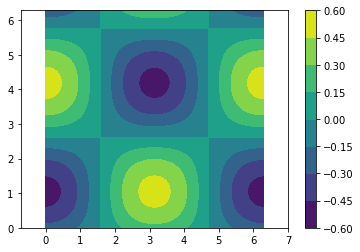

In [16]:
f = lambdify((t,p,ta,pa),trigsimp(Expected), "numpy")
ta_range = np.linspace(0,2*np.pi,1000)
pa_range = np.linspace(0,2*np.pi,1000)
phi_fixed = np.pi/3
X, Y = np.meshgrid(ta_range, pa_range)
def ftemp(ta_val,pa_val):
    return f(0,phi_fixed,ta_val,pa_val)
Z = ftemp(X,Y)
fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, Z)
fig.colorbar(cp) # Add a colorbar to a plot
plt.xlim(0,2*np.pi)
plt.ylim(0,2*np.pi)
ax.axis('equal')

In [20]:
G_input = Matrix([1,0,1,0])*Matrix([1,0,1,0]).T
conjugate(AR_PS)*G_input*AR_PS.T

Matrix([
[             cos(phi_a/2)**2, I*sin(phi_a/2)*cos(phi_a/2),    cos(phi_a/2), 0],
[-I*sin(phi_a/2)*cos(phi_a/2),             sin(phi_a/2)**2, -I*sin(phi_a/2), 0],
[                cos(phi_a/2),              I*sin(phi_a/2),               1, 0],
[                           0,                           0,               0, 0]])